In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [39]:
data = pd.read_excel (r'D:\Downloads\rk_month.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [40]:
import datetime as dt

In [41]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [42]:
df=data.loc['0':'365']

In [43]:
X1 = df[['From Date','year', 'month', 'day']]
Y1 = df['PM2.5']

In [44]:
xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=3)

In [45]:
grad_boost = GradientBoostingRegressor(n_estimators=200,
                                      max_depth=7,
                                      max_features='auto',
                                      min_samples_split=7,
                                      min_samples_leaf=3,
                                      learning_rate=0.1)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(max_depth=7, max_features='auto', min_samples_leaf=3,
                          min_samples_split=7, n_estimators=200)

In [46]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.9970979984667433

Score on test data: 0.8125442998757151

Root Mean Squared Error: 32.18565257289448

Overall model accuracy: 0.8125442998757151


In [47]:
test=data.loc['366':'418']
X=test[['From Date','year', 'month', 'day']]
X

,From Date,year,month,day
366,737436,2020,1,12
367,737443,2020,1,19
368,737450,2020,1,26
369,737457,2020,2,2
370,737464,2020,2,9
371,737471,2020,2,16
372,737478,2020,2,23
373,737485,2020,3,1
374,737492,2020,3,8
375,737499,2020,3,15


In [48]:
predict=grad_boost.predict(X)

In [49]:
predict

array([206.3726634 , 192.33802125, 158.37524178, 142.23911832,
       146.57921114, 158.24806667,  84.95864192,   1.13025922,
        39.58983849,  47.16929281,  43.25113641,  56.92674549,
        32.30381925,  46.03739343,  42.26151763,  45.78995436,
        28.24264051,  42.77674353,  48.00010765,  46.73615857,
        56.01914545,  54.76385008,  55.66059337,  63.2429167 ,
        48.21510035,  21.10794488,  33.36822774,  26.12446152,
        24.83189682,  14.64869105,  31.42960847,  27.8408516 ,
        24.23033213,  30.73814164,  23.30537284,  37.84331846,
        28.77465549,  27.78912534,  38.40139149,  57.27604553,
        72.20318396,  85.15268675,  90.16680393, 145.68030169,
       145.48072999, 146.04472487, 187.8630603 , 154.67984007,
       156.17663926, 153.23473341, 152.56604038, 157.62213337])

In [50]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [51]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [52]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [53]:
X['pred']=predict

<AxesSubplot:xlabel='From Date'>

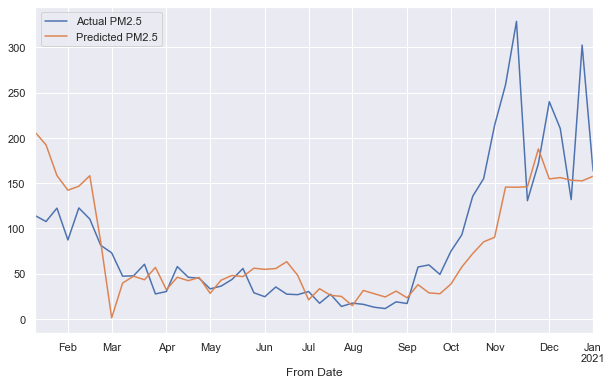

In [54]:
test['PM2.5'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted PM2.5')

In [55]:
np.sqrt(mean_squared_error(test['PM2.5'],X['pred']))

52.508955872691445

In [56]:
mae = metrics.mean_absolute_error(ytest, gboost_pred)
mse = metrics.mean_squared_error(ytest, gboost_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,gboost_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 21.896705606973452
MSE: 1035.9162315430694
RMSE: 32.18565257289448
R-Squared: 0.8125442998757151


In [57]:
mae = metrics.mean_absolute_error(test['PM2.5'],X['pred'])
mse = metrics.mean_squared_error(test['PM2.5'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['PM2.5'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 34.52408687334079
MSE: 2757.1904468402577
RMSE: 52.508955872691445
R-Squared: 0.5356152861428338


In [58]:
import pickle
filename = 'PM2.5_gboostmodel.sav'
pickle.dump(grad_boost, open(filename, 'wb'))

In [59]:
#load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.8125442998757151


# 3rd plot

In [60]:
testcase = pd.DataFrame()

In [61]:
testcase['test']=ytest
testcase['pred']=gboost_pred

In [62]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [63]:
testcase

,test,pred,Corrected
102,205.101429,219.615079,187.429427
330,71.528571,52.149346,84.334999
240,42.341429,50.574038,18.388386
24,97.628571,82.470954,114.656606
134,30.080000,50.232869,18.047216
...,...,...,...
123,105.201429,107.920141,75.734489
214,97.521429,129.541534,97.355881
23,89.071429,100.157814,67.972161
209,95.229429,192.394759,160.209107


In [64]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [65]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.8687060581228602

In [66]:
test2020=pd.DataFrame()

In [67]:
test2020['test']=test['PM2.5']
test2020['pred']=X['pred']

In [68]:
test2020.index=test.index

In [69]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

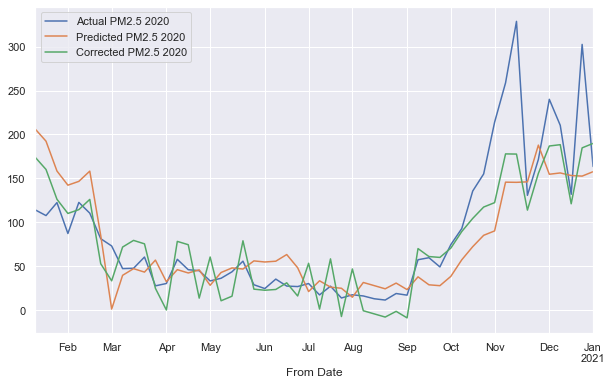

In [70]:
test2020['test'].plot(legend=True, label='Actual PM2.5 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted PM2.5 2020')
test2020["Corrected"].plot(legend=True, label='Corrected PM2.5 2020')

In [71]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.5780444215868827

In [72]:
test2020

,test,pred,Corrected
From Date,,,
2020-01-12,114.211429,206.372663,174.187011
2020-01-19,107.625714,192.338021,160.152369
2020-01-26,122.400000,158.375242,126.189589
2020-02-02,87.221429,142.239118,110.053466
2020-02-09,122.615714,146.579211,114.393559
2020-02-16,110.378571,158.248067,126.062414
2020-02-23,81.301429,84.958642,52.772989
2020-03-01,73.005714,1.130259,33.315912
2020-03-08,47.241429,39.589838,71.775491


In [73]:
test2020.loc["2020-05-18":"2020-05-31",'pred'].median()

51.37765200823991

In [75]:
test2020.loc["2020-01-30":"2020-03-22",'pred'].median()

66.06396736696473